# Decision Tree

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score, RandomizedSearchCV, cross_validate

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   per_gop                  3113 non-null   float64
 1   per_dem                  3113 non-null   float64
 2   per_third_party          3113 non-null   float64
 3   County_with_State        3113 non-null   object 
 4   Date                     3113 non-null   object 
 5   Series_Complete_Pop_Pct  3113 non-null   float64
 6   Metro_status             3113 non-null   int64  
 7   PCTPOVALL_2021           3113 non-null   int64  
 8   MEDHHINC_2021            3113 non-null   int64  
 9   WA                       3113 non-null   float64
 10  BA                       3113 non-null   float64
 11  IA                       3113 non-null   float64
 12  AAPI                     3113 non-null   float64
 13  MEDIAN_AGE_TOT           3113 non-null   float64
 14  through_hs              

In [4]:
y = df.target
X = df.drop(columns =['target', 'Series_Complete_Pop_Pct','County_with_State', 'Date'], axis=1) 

In [5]:
y.value_counts(normalize=True)

0    0.892708
1    0.107292
Name: target, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [7]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [8]:
dt.score(X_train, y_train)

1.0

In [9]:
dt.score(X_test, y_test)

0.8908857509627728

In [10]:
# plot_tree(dt);

## Grid Search DT

In [11]:
grid = {'max_depth': [None, 4, 5, 6],
       'min_samples_split': [1, 2, 3],
       'min_samples_leaf': [1, 9, 10],
        
       }
grid

{'max_depth': [None, 4, 5, 6],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 9, 10]}

In [12]:
gs = GridSearchCV(estimator=dt, scoring='precision', param_grid=grid, verbose=3, n_jobs=-3)

In [13]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-3)]: Done 169 out of 180 | elapsed:    3.9s remaining:    0.3s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:    3.9s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), n_jobs=-3,
             param_grid={'max_depth': [None, 4, 5, 6],
                         'min_samples_leaf': [1, 9, 10],
                         'min_samples_split': [1, 2, 3]},
             scoring='precision', verbose=3)

In [14]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}

In [15]:
gs.best_score_

0.7261483614424791

In [16]:
final_dt = gs.best_estimator_
final_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, random_state=1)

In [17]:
cross_validate(final_dt, X_train, y_train, scoring=['precision', 'accuracy'],return_train_score=True)

{'fit_time': array([0.01388097, 0.01294184, 0.011446  , 0.01159692, 0.011415  ]),
 'score_time': array([0.00403023, 0.0031662 , 0.00254798, 0.00254917, 0.00245404]),
 'test_precision': array([0.84848485, 0.60784314, 0.87878788, 0.58974359, 0.70588235]),
 'train_precision': array([0.82269504, 0.86896552, 0.77514793, 0.80128205, 0.82758621]),
 'test_accuracy': array([0.94004283, 0.9143469 , 0.94432548, 0.90578158, 0.92274678]),
 'train_accuracy': array([0.94001071, 0.94858061, 0.94108195, 0.94161757, 0.94164882])}

# Decision Tree w/ Scaling + SMOTE

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
"""
SMOTE uses nearest neighbors: finds the closest data points to the one we’re currently on, create a synthetic one based on that cluster
That’s better than just duplicating existing data (random oversampling/resampling) like we illustrated in (2) above
Since SMOTE is distance based, outliers have an effect
Might need to deal with outliers so we’re not increasing # of outliers
→  SMOTE needs scaling b/c it’s distanced based!
"""

'\nSMOTE uses nearest neighbors: finds the closest data points to the one we’re currently on, create a synthetic one based on that cluster\nThat’s better than just duplicating existing data (random oversampling/resampling) like we illustrated in (2) above\nSince SMOTE is distance based, outliers have an effect\nMight need to deal with outliers so we’re not increasing # of outliers\n→  SMOTE needs scaling b/c it’s distanced based!\n'

In [20]:
sm = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=10)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

In [21]:
X_train_smote.shape

(4160, 13)

In [22]:
y_train_smote.value_counts()

1    2080
0    2080
Name: target, dtype: int64

In [23]:
X_train_scaled.shape

(2334, 13)

In [24]:
y_train.value_counts()

0    2080
1     254
Name: target, dtype: int64

In [25]:
dt2 = DecisionTreeClassifier(random_state=1)
dt2.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=1)

In [26]:
dt2.score(X_train_smote, y_train_smote)

1.0

In [27]:
dt2.score(X_test, y_test)

0.8973042362002568

In [28]:
# plot_tree(dt2);

In [29]:
# Explanation: significantly worse accuracy = model was predicting based on imbalance rather than learning 
# Accuracy of first model is about equal to class imbalance, making it about = to a dummy model that just predicted majority

In [30]:
feature_used = list(X.columns)
feature_used

['per_gop',
 'per_dem',
 'per_third_party',
 'Metro_status',
 'PCTPOVALL_2021',
 'MEDHHINC_2021',
 'WA',
 'BA',
 'IA',
 'AAPI',
 'MEDIAN_AGE_TOT',
 'through_hs',
 'college_up']

In [31]:
dt.feature_importances_
dict(zip(dt.feature_importances_, feature_used))

{0.04017851007151025: 'per_gop',
 0.30853705314289837: 'per_dem',
 0.04589689382861487: 'per_third_party',
 0.006626665657177468: 'Metro_status',
 0.017503240761205026: 'PCTPOVALL_2021',
 0.10805775871916706: 'MEDHHINC_2021',
 0.03801045244549681: 'WA',
 0.14072096362424824: 'BA',
 0.08685567186522311: 'IA',
 0.058225937367950203: 'AAPI',
 0.08365512310082536: 'MEDIAN_AGE_TOT',
 0.03983575392875497: 'through_hs',
 0.0258959754869283: 'college_up'}

In [32]:
dt2.feature_importances_
dict(zip(dt2.feature_importances_, feature_used))

{0.5260022320903694: 'per_gop',
 0.03558771691183576: 'per_dem',
 0.03013934372525479: 'per_third_party',
 0.0052588575217885555: 'Metro_status',
 0.05819432147480783: 'PCTPOVALL_2021',
 0.03471207916406493: 'MEDHHINC_2021',
 0.022656685461235906: 'WA',
 0.10086188154965225: 'BA',
 0.05985255567706256: 'IA',
 0.03843792211230968: 'AAPI',
 0.05294006300708196: 'MEDIAN_AGE_TOT',
 0.019646090976676387: 'through_hs',
 0.015710250327859995: 'college_up'}

# Visualizations based on dt feature importance

In [33]:
# def visual(y):
#     plt.figure()
#     sns.scatterplot(x=df['Series_Complete_Pop_Pct'], y=df[y], hue = df['target'], markers=["o", "s"])
#     plt.xlabel('% Vaccinated')
#     plt.ylabel('%', y.strip('per_'))
#     plt.show()

def visual(y):
    fig, ax = plt.subplots(figsize=(6.4))
    ax.scatter(x=df['Series_Complete_Pop_Pct'], y=df[y], hue = df['target'], markers=["o", "s"])
    plt.show()

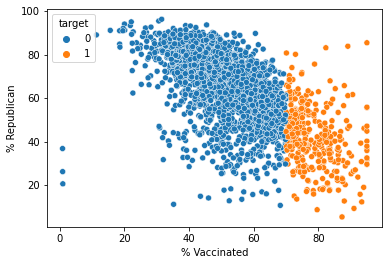

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure()
sns.scatterplot(x=df['Series_Complete_Pop_Pct'], y=df['per_gop'], hue = df['target'], markers=["o", "s"])
plt.xlabel('% Vaccinated')
plt.ylabel('% Republican')
plt.show()
plt.savefig('../images/republican_scatter.png')

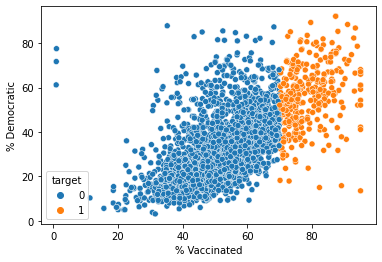

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure()
sns.scatterplot(x=df['Series_Complete_Pop_Pct'], y=df['per_dem'], hue = df['target'], markers=["o", "s"])
plt.xlabel('% Vaccinated')
plt.ylabel('% Democratic')
plt.show()
plt.savefig('../images/democrat_scatter.png')

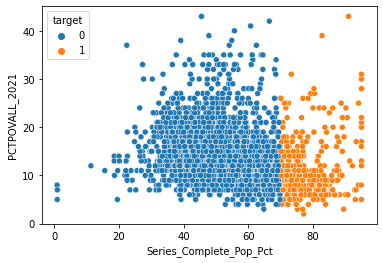

In [42]:
visual('PCTPOVALL_2021')
# 'PCTPOVALL_2021', "MEDIAN_AGE_TOT"

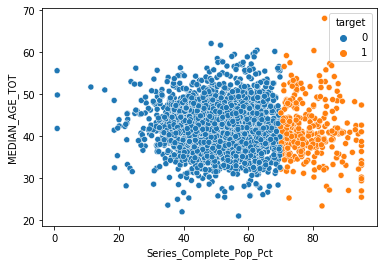

In [43]:
visual('MEDIAN_AGE_TOT')

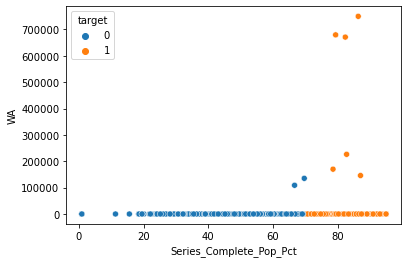

In [44]:
visual('WA')

In [46]:
df['BA'].describe()

count      3113.000000
mean        158.994186
std        4344.787479
min           0.000000
25%           1.000000
50%           2.800000
75%          11.100000
max      149165.000000
Name: BA, dtype: float64

In [ ]:
# WA, BA, IA, AAPI

# Logistic Regression

## Dummy Classifier Logreg

In [119]:
dummy_model = DummyClassifier(strategy='most_frequent')


In [120]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [121]:
dummy_model.score(X_train, y_train)

0.8911739502999143

In [122]:
dt.score(X_test, y_test)

0.8818998716302953

In [123]:
y_pred = dummy_model.predict(X_train)


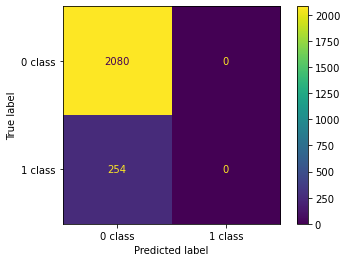

In [124]:
cm = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

In [125]:
precision_score(y_train, y_pred)

/Users/shelleywang/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [126]:
# Model Evaluation
cv_results0 = cross_validate(dummy_model, X_train, y_train, cv=5, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results0 = print('dummy reg \ntest precision', cv_results0['test_precision'].mean(), 'test accuracy', cv_results0['test_accuracy'].mean(), '\n' 'train precision', cv_results0['train_precision'].mean(), 'train accuracy', cv_results0['train_accuracy'].mean())

dummy reg 
test precision 0.0 test accuracy 0.8911746055086341 
train precision 0.0 train accuracy 0.8911739911846576


/Users/shelleywang/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
dummy_model.score(X_test, y_test)

0.8973042362002568

## Simple Log Reg first

In [128]:
simple_logreg_model = LogisticRegression(random_state=1, penalty='none', max_iter=1e3)

In [129]:
# no scaling since no penalty
simple_logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000.0, penalty='none', random_state=1)

In [130]:
simple_logreg_model.predict(X_train)

array([1, 0, 1, ..., 0, 1, 0])

In [131]:
cv_results = cross_validate(simple_logreg_model, X_train, y_train, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results = print('simple log reg \n test precision', cv_results['test_precision'].mean(), 'test accuracy', cv_results['test_accuracy'].mean(), '\n' 'train precision', cv_results['train_precision'].mean(), 'train accuracy', cv_results['train_accuracy'].mean())

simple log reg 
 test precision 0.7834315748108851 test accuracy 0.9284484105467279 
train precision 0.767796252905055 train accuracy 0.9281285232409171


### Simple log reg w/ Smote

In [132]:
# fitting to smoted and scaled data now
simple_logreg_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000.0, penalty='none', random_state=1)

In [133]:
simple_logreg_model.predict(X_train_smote)

array([1, 0, 1, ..., 1, 1, 1])

In [134]:
cv_results1 = cross_validate(simple_logreg_model, X_train_smote, y_train_smote, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results1 = print('logreg smote \ntest precision', cv_results1['test_precision'].mean(), 'test accuracy', cv_results1['test_accuracy'].mean(),'\ntrain precision', cv_results1['train_precision'].mean(), 'train accuracy', cv_results1['train_accuracy'].mean())

logreg smote 
test precision 0.8713747647541219 test accuracy 0.8754807692307693 
train precision 0.8678197123869055 train accuracy 0.8721754807692308


In [135]:
y_pred_smote = simple_logreg_model.predict(X_train_smote)

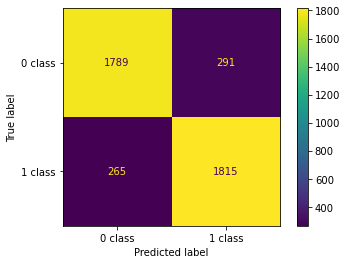

In [136]:
cm = confusion_matrix(y_train_smote, y_pred_smote)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

## Log Reg w/ Regularization

In [137]:
logreg_model = LogisticRegression(random_state=1, penalty='l2', max_iter=1e3)

In [138]:
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000.0, random_state=1)

In [139]:
logreg_model.predict(X_train_scaled)

array([1, 0, 1, ..., 0, 1, 0])

In [140]:
cv_results2 = cross_validate(logreg_model, X_train_scaled, y_train, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results2 = print('logreg regularized \ntest precision', cv_results2['test_precision'].mean(), 'test accuracy', cv_results2['test_accuracy'].mean(), '\ntrain precision', cv_results2['train_precision'].mean(), 'train accuracy', cv_results2['train_accuracy'].mean())

logreg regularized 
test precision 0.7535844280240832 test accuracy 0.9241657553004752 
train precision 0.7606176835951772 train accuracy 0.925878695567899


In [141]:
y_pred_regularized = logreg_model.predict(X_train_scaled)

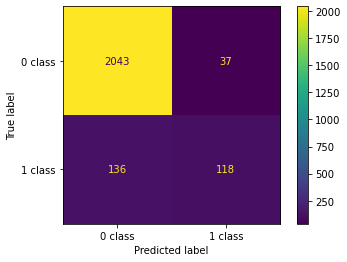

In [142]:
cm = confusion_matrix(y_train, y_pred_regularized)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

### Logreg w/ Regularization on SMOTE

In [143]:
logreg_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000.0, random_state=1)

In [144]:
logreg_model.predict(X_train_smote)

array([1, 0, 1, ..., 1, 1, 1])

In [145]:
cv_results3 = cross_validate(logreg_model, X_train_smote, y_train_smote, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results3 = print('logreg w/ reg & smote \ntest precision', cv_results3['test_precision'].mean(), 'test accuracy', cv_results3['test_accuracy'].mean(), '\ntrain precision', cv_results3['train_precision'].mean(), 'train accuracy', cv_results3['train_accuracy'].mean())

logreg w/ reg & smote 
test precision 0.8540348505446683 test accuracy 0.8560096153846153 
train precision 0.8539332628572509 train accuracy 0.8561899038461538


In [146]:
y_pred_reg_smote = logreg_model.predict(X_train_smote)

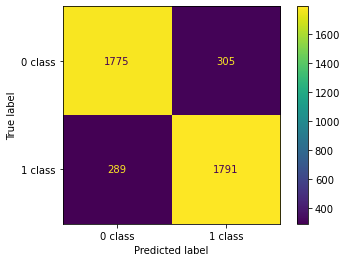

In [147]:
cm = confusion_matrix(y_train_smote, y_pred_reg_smote)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

## Logreg w/ Class Weight

In [148]:
logreg_cw_model = LogisticRegression(class_weight='balanced', random_state=3, penalty='l2', max_iter=1e3)

In [149]:
logreg_cw_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000.0, random_state=3)

In [150]:
logreg_cw_model.predict(X_train_scaled)

array([1, 0, 1, ..., 1, 1, 0])

In [151]:
print(feature_used)
logreg_cw_model.coef_

['per_gop', 'per_dem', 'per_third_party', 'Metro_status', 'PCTPOVALL_2021', 'MEDHHINC_2021', 'WA', 'BA', 'IA', 'AAPI', 'MEDIAN_AGE_TOT', 'through_hs', 'college_up']


array([[-0.91135329,  0.83229479,  0.01810093, -0.14936542,  0.00851424,
         0.6297668 , -1.34518492, -1.15123541,  3.61542156, -0.54300771,
         0.34840464, -0.03234532,  0.03218183]])

In [152]:
cv_results4 = cross_validate(logreg_cw_model, X_train_scaled, y_train, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results4 = print('logreg w/ class weight \ntest precision', cv_results4['test_precision'].mean(), 'test accuracy', cv_results4['test_accuracy'].mean(), '\ntrain precision', cv_results4['train_precision'].mean(), 'train accuracy', cv_results4['train_accuracy'].mean())

logreg w/ class weight 
test precision 0.4017565914445692 test accuracy 0.8453253807059948 
train precision 0.3969828787099982 train accuracy 0.8439372443051809


In [153]:
y_pred_cw = logreg_cw_model.predict(X_train_scaled)

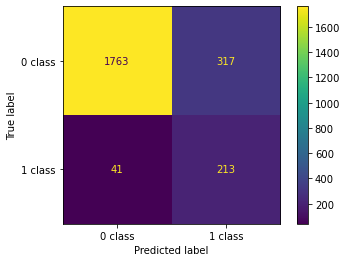

In [154]:
cm = confusion_matrix(y_train, y_pred_cw)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

In [155]:
cv_results4

## Grid Search the CW Log Reg Model

In [162]:
weights = np.linspace(0.0,0.99,10)
vals = [{0:x, 1:1.0-x} for x in weights]

grid2 = {'class_weight': [None],
         'smote':
       'max_iter': [80, 100, 120],
       'C': [80, 100, 120],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'saga', 'lbfgs']
       }
grid2

{'class_weight': [None],
 'max_iter': [80, 100, 120],
 'C': [80, 100, 120],
 'penalty': ['l1', 'l2'],
 'solver': ['liblinear', 'saga', 'lbfgs']}

In [163]:
gs2 = GridSearchCV(estimator=logreg_cw_model, scoring='precision', param_grid=grid2, verbose=3, n_jobs=-3)

In [164]:
gs2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-3)]: Done 166 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-3)]: Done 270 out of 270 | elapsed:   20.8s finished


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000.0, random_state=3),
             n_jobs=-3,
             param_grid={'C': [80, 100, 120], 'class_weight': [None],
                         'max_iter': [80, 100, 120], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='precision', verbose=3)

In [165]:
gs2.best_params_

{'C': 80,
 'class_weight': None,
 'max_iter': 80,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [ ]:
gs2.best_score_

In [ ]:
final_model = gs2.best_estimator_
final_model

# Pipeline for Log Reg

In [ ]:
from imblearn.pipeline import Pipeline

y = df['target']
X = df.drop(columns=['target', 'Series_Complete_Pop_Pct', 'County_with_State', "Date"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy="minority", k_neighbors=10)),
    ('dt', DecisionTreeClassifier(random_state=1))
])

pipe.fit(X_train, y_train)

list(zip(pipe['dt'].feature_importances_, X_train.columns))
